In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

complete_csv = "cleanData/CleanFullDataSet.csv"
compl_df = pd.read_csv(complete_csv, low_memory=False)
raw_csv = "../data/human_trafficking.csv"
raw_df = pd.read_csv(raw_csv, low_memory=False)

country_csv = "../data/CountryCodes.csv"
country_df = pd.read_csv(country_csv, low_memory=False)

In [2]:
raw_df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


In [3]:
#selected only the required data from the raw dataframe
raw_data = raw_df.loc[:,["gender","ageBroad","citizenship","CountryOfExploitation"]]


In [4]:
#dropping all the unknown values in the specified column
unknown = raw_data[raw_data["CountryOfExploitation"] == "-99"].index
raw_data.drop(unknown, inplace= True)

In [5]:
#dropping all the unknown value in the specified column
unknown = raw_data[raw_data["citizenship"] == "-99"].index
raw_data.drop(unknown, inplace= True)

In [6]:
#cleaned up the data counts and dropped all na and missing data 
raw_data.count()

gender                   38498
ageBroad                 38498
citizenship              38498
CountryOfExploitation    38498
dtype: int64

In [7]:
country_df.columns

Index(['Global Code', 'Global Name', 'Region Code', 'Region Name',
       'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code',
       'Intermediate Region Name', 'Country or Area', 'M49 Code',
       'ISO-alpha2 Code', 'ISO-alpha3 Code', 'Least Developed Countries (LDC)',
       'Land Locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)',
       'Developed / Developing Countries', 'Unnamed: 16'],
      dtype='object')

In [8]:
#had to recreate the whole country code due missing data on the clean df
country_df= country_df.loc[:,["ISO-alpha2 Code",'Country or Area',"Sub-region Name", "Region Name", "Intermediate Region Name"]]

In [9]:
raw_data.columns

Index(['gender', 'ageBroad', 'citizenship', 'CountryOfExploitation'], dtype='object')

In [10]:
#added the citizenship of case victim, treating it similiar to Vlookup function in excel
raw_data= raw_data.rename(columns={'citizenship': "ISO-alpha2 Code"})
raw_data = pd.merge(raw_data,country_df, on="ISO-alpha2 Code", how='left')
raw_data = raw_data.rename(columns={'Country or Area': "Citizenship", "Sub-region Name": "Sub-Region Citzenship",
                                   "Region Name": "Region Citizenship"})


In [11]:
#dropping unnecessary columns
raw_data = raw_data.drop(columns=["ISO-alpha2 Code","Intermediate Region Name"])
raw_data

,gender,ageBroad,CountryOfExploitation,Citizenship,Sub-Region Citzenship,Region Citizenship
0,Female,18--20,RS,Republic of Moldova,Eastern Europe,Europe
1,Female,18--20,RS,Republic of Moldova,Eastern Europe,Europe
2,Female,18--20,RS,Republic of Moldova,Eastern Europe,Europe
3,Female,18--20,RS,Republic of Moldova,Eastern Europe,Europe
4,Female,18--20,RS,Republic of Moldova,Eastern Europe,Europe
...,...,...,...,...,...,...
38493,Female,-99,UG,Uganda,Sub-Saharan Africa,Africa
38494,Female,-99,UG,Uganda,Sub-Saharan Africa,Africa
38495,Female,-99,UG,Uganda,Sub-Saharan Africa,Africa
38496,Female,-99,UG,Uganda,Sub-Saharan Africa,Africa


In [12]:
#to get the exploit Country Name, similar methods as identifying citienship, lots of redundant work
raw_data= raw_data.rename(columns={'CountryOfExploitation': "ISO-alpha2 Code"})
raw_data = pd.merge(raw_data,country_df, on="ISO-alpha2 Code", how='left')
raw_data = raw_data.rename(columns={'Country or Area': "Exploited Country", "Sub-region Name": "Sub-Region Exploit",
                                   "Region Name": "Region Exploit"})

In [13]:
#dropping columns
raw_data = raw_data.drop(columns=["ISO-alpha2 Code","Intermediate Region Name"])
raw_data

,gender,ageBroad,Citizenship,Sub-Region Citzenship,Region Citizenship,Exploited Country,Sub-Region Exploit,Region Exploit
0,Female,18--20,Republic of Moldova,Eastern Europe,Europe,Serbia,Southern Europe,Europe
1,Female,18--20,Republic of Moldova,Eastern Europe,Europe,Serbia,Southern Europe,Europe
2,Female,18--20,Republic of Moldova,Eastern Europe,Europe,Serbia,Southern Europe,Europe
3,Female,18--20,Republic of Moldova,Eastern Europe,Europe,Serbia,Southern Europe,Europe
4,Female,18--20,Republic of Moldova,Eastern Europe,Europe,Serbia,Southern Europe,Europe
...,...,...,...,...,...,...,...,...
38493,Female,-99,Uganda,Sub-Saharan Africa,Africa,Uganda,Sub-Saharan Africa,Africa
38494,Female,-99,Uganda,Sub-Saharan Africa,Africa,Uganda,Sub-Saharan Africa,Africa
38495,Female,-99,Uganda,Sub-Saharan Africa,Africa,Uganda,Sub-Saharan Africa,Africa
38496,Female,-99,Uganda,Sub-Saharan Africa,Africa,Uganda,Sub-Saharan Africa,Africa


In [14]:
#dropping unknown/missing data so all the counts are the same
raw_data["ageBroad"]= raw_data["ageBroad"].replace(['-99'],'unknown')
raw_data.count()

gender                   38498
ageBroad                 38498
Citizenship              29640
Sub-Region Citzenship    29640
Region Citizenship       29640
Exploited Country        37590
Sub-Region Exploit       37590
Region Exploit           37590
dtype: int64

In [15]:
#droping na
raw_data=raw_data.dropna(how="any")

In [16]:
#counts are all the same so cleaner data to work with
raw_data.count()

gender                   28732
ageBroad                 28732
Citizenship              28732
Sub-Region Citzenship    28732
Region Citizenship       28732
Exploited Country        28732
Sub-Region Exploit       28732
Region Exploit           28732
dtype: int64

In [17]:
# raw_data["Exploited Country"].value_counts()

In [18]:
#getting the values counts of Country for cases
citizens_count = raw_data["Citizenship"].value_counts()
# citizens_count

In [19]:
#getting the value counts of Exploited country for cases
raw_data= raw_data.groupby("Citizenship")
exploited_count = raw_data["Exploited Country"].value_counts()

In [20]:
#creating dataframe and reseting the index
exp_df = pd.DataFrame({"Exploited Size": exploited_count})
exp_df=exp_df.reset_index()

In [21]:
#creating dataframe for citizenships and reseting index
citizen_df = pd.DataFrame({"Citizenship Size": citizens_count})
citizen_df=citizen_df.reset_index()
citizen_df = citizen_df.rename(columns={"index": "Citizenship"})
# citizen_df

In [22]:
#merging the two data, will be used for the nested pie chart
citizen_exploit_df = pd.merge(exp_df,citizen_df, on="Citizenship")
citizen_exploit_df

,Citizenship,Exploited Country,Exploited Size,Citizenship Size
0,Afghanistan,Afghanistan,83,97
1,Afghanistan,Saudi Arabia,14,97
2,Albania,Albania,22,22
3,Bangladesh,Tajikistan,11,11
4,Belarus,Russian Federation,751,1239
...,...,...,...,...
93,Uzbekistan,Kazakhstan,57,261
94,Uzbekistan,Russian Federation,11,261
95,Viet Nam,Malaysia,108,170
96,Viet Nam,Cambodia,46,170


In [23]:
#counts are still equal
citizen_exploit_df.count()

Citizenship          98
Exploited Country    98
Exploited Size       98
Citizenship Size     98
dtype: int64

In [28]:
#getting the top 5 country with the highest cases
top_5 = citizen_df.sort_values(by="Citizenship Size", ascending=False)
top_5= top_5.reset_index(drop=True)
top_5.head()

,Citizenship,Citizenship Size
0,Ukraine,7750
1,Republic of Moldova,4750
2,United States of America,3636
3,Philippines,2663
4,Indonesia,1797


In [31]:
#creating a list from the top 5
five_countries= list(top_5["Citizenship"].head())
five_country_size = list(top_5["Citizenship Size"].head())
five_countries

['Ukraine',
 'Republic of Moldova',
 'United States of America',
 'Philippines',
 'Indonesia']

In [39]:
#top 5 exploited countries, getting the names of countries that citizen from top5 were exploited to
t_5_e = citizen_exploit_df.loc[citizen_exploit_df["Citizenship"].isin(five_countries), :]
t_5_e = t_5_e.drop_duplicates()
t_5_e = t_5_e.sort_values(by=["Citizenship Size","Exploited Size"], ascending=False)
t_5_e = t_5_e.reset_index(drop=True)
t_5_e.to_csv("png/color.csv")

In [35]:
#creating a list for exploited country
exploit_country = list(t_5_e["Exploited Country"])
exploit_country_size = list(t_5_e["Exploited Size"])

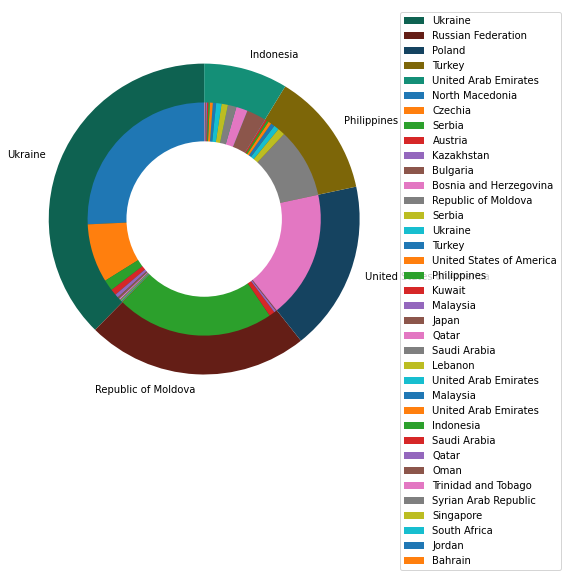

In [37]:
#work in progress nested pie graphs
plt.figure(figsize=(8, 8))



labels = five_countries
sizes = five_country_size
sub_labels = exploit_country
sub_sizes = exploit_country_size

big_colors = ['#0E6251', '#641E16', '#154360', '#7D6608','#148F77']

bigger = plt.pie(sizes,startangle=90,labels=labels, frame=True, colors=big_colors)
smaller = plt.pie(sub_sizes,radius=0.75, startangle=90)
centre_circle = plt.Circle((0, 0), 0.5, color='black',fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels=sub_labels,bbox_to_anchor=(1.05, 1))


plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#links I used for reference: 
#http://www.nxn.se/valent/making-nicer-looking-pie-charts-with-matplotlib
#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f